# Quick test 1

In [1]:
using ForneyLab       # based on last official release
using LinearAlgebra
using Plots
using PyPlot
using ProgressMeter
using Compat
using WAV
using Base64
using FileIO
using HDF5
using FLAC
using DSP
using LAR
using LAR.AR
using LAR.DataAR

using FFTW


include("functions/auxiliary/buffer.jl")
include("functions/auxiliary/audioplayer.jl")
include("functions/auxiliary/workflow.jl")
include("functions/auxiliary/fourier.jl")
include("functions/auxiliary/warpedfilter.jl")
;

## Load signal

In [2]:
# specify desired sampling frequency
fs_desired = 16000

# load and process drilling sound
x_drill, fs_drill = wavread("data/drilling.wav", format="native")
fs_drill = Int(fs_drill)
x_drill = x_drill[11*fs_drill+1:14*fs_drill]
x_drill = resample(x_drill, fs_desired/fs_drill)
x_drill = 100*x_drill/var(x_drill)

# specify time axis
t = collect((1:length(x_drill))/fs_desired)

# create plots of {drill, speech, combined}
audioplayers(x_drill, fs=fs_desired)
;

<source src="data:audio/wav;base64,UklGRjzuAgBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQDuAgDYTNG42fvFuGjpGTlHnjk5J8+COWucpznRhZE5tkiFOUtjUDkj7mo5F0UuOe4bDDn2rhA3PfKMudlN0Lk3bve5VZ4Fuo49HbpOeyO6K8EFukddxrnaSrm5VGG0uWFl5bmLyuS5qSWOuX8+v7jeDzM4P8KLt7RTz7eoM3u35nz/uCe56rjzc1y56Vz9uBN58DeZWLI451gpOY0fXzmPafM4lVk2tiWYpTfUibw4fPpoOWCnjjikNY22hhLpOKOb+TcWMS44Hho8tvuCE7hXKCK5MeR0uamlqrmJ8+a5ET7YuRXkfbmTAla5VkT5uGPxKrkxLwi5vKGsuLh9P7ntfhC5F2qbN7ALuDhCqkU5sSStOfMRmjmfaDw5fuWMOaAZjzl3D9M4rzhiuAkfCrlagw65gD2ut8iVCLmcFyy5Ezd5t+GEoDjjHDI4QGFBOAxCqDhriJA58g2+ORX/ADosrfY5o83VOVytlTnt3BU5vpfHOEC+MTdV9Ri5OyGKuftaprg9BcQ3wp5QuIBx87ip5Fm5+QaIuSOL/bh0XzU3Fs6DOKFJUTlYO4g5FWSPORTZYjn5Yyg4UMG6NBSwpLdyoYA4/yiuNkR42Tdrpl+4qEwvucDtG7lZXpm50CfZuQ+g6Lmkur250EMpucY9tDixnpo5oVzVOaf+BTogp/c5ekN3OUdu1zhekBo5jo5YN3FdbbktRYa5vmlbucVVgbn1a5S5dkvyuWQ1Brogwea53ibnuSwdxbnG0Pa51KnruRbri7mHQRq5l2EwuSvfXbkNrk65okEnuHpeJDnZGxQ6QlEPOgdk0TmRODs5srLst7DsQTeg3UC3gToOueHUd7kNofG4vLg8OZZl9TlNsMA52A5VOSc/ZznkhpM5RvPWOeizCzoUgxA6nCPAOeSzgzmbEzE5EYKnuP+darmg8NG5I8TvubrR/LlPcsy5nkQPupy2MLqMdRG6wmlguQO0QzjoBpU4BdOhOJAxWznjmcQ5CQ0hOqoQaDoshIg6SN1wOlRZVTocej46zoI+OtGULTqCHQ06ZjCyOauRlzhPMsI4JLOgOG0E2jcJXNC4rs3YuM3eZrh7Ceo4dXkkOWuvjjiExpi2bBsYtjmnpzc+5ia5BKCpuXsR67nlXFC5MuwhuI1RH7kB2+65FAgKuuR117kjaEi5fNFfuTb1trniOSS6xYIour5oobn/4ya5m5GWuBJS9LjJAkk4MJrONV7lWDjp2iM5Y0xeOa11DrmyjY252IeHudBobrkubqG5cbo1unZ6a7otfl+6nRg7uowhU7rDNGG6IcQ1ulO4xrkVqYy5Z2WpuCf+rbj/LmS5gE7TuCrhCDhJ67w4A2zPNbZPR7m6F1G5htkcuQzBk7dU2ik538DkObZLsjk6GP44ezlUOaDKrTnYF205SyYoOdEbGzkYv+g5H/s0Ol+LIDpsKvI5bhy9ObmbkDmrL4I418cxuG5SgriXhGI4GncEOb0tYTk8g1I5aRKXOe/jbzn34Kg4XDIuOUyunznzKIQ5fWrsOFeBnznn49o5xqW0OXkNkDmSaUQ5XfiCuP7VrbmMvMm5FClVubdgLrnpCF65s62Mudq2P7lTYCq4k66wM6bbKbjrWbe38VIZOY9CFjkATGc2zVpVOUpGADoeXd05Ms5QOci5FDmgTkE4F9HaN6tfEznNweU5llAUOhmFAjr1NI0550d4OMJXhLcVoj+4NTOSOFkkazm5SIU5/zCJOYq3sjm6lwk6jFO9Odp517hTqDS5t9jWuX9JBLqiHVW6NEyPuoaMSLqqJfa56PQ+upS0bboMPkO6QlrPubfTiblAWLG430HTOGhlgTml71g4qOnruM2yRDabvvk4kwicOS3gOTlgrw850LV2OSlgzTm8tgI69qfMOZpniTl9qZw5PGrhOU4I8jnRDgU65iMcOrhS2zll5Nk5ylMbOiTm3jlnGpk5KhM/OTHyVbehnJm5GA7tucD5Arq/nNO5J0TAuWmB0bnEq4W5gyMXuX77JLmOITQ5a7iGOQEgYTkPR8M5O80mOq9jdjqjJ146+WJXOicEUjpxNWw6yGo9OvKbxTnH9AU5JANgOd8tJzmO+0Q4PzfcuXxEMbq8el26R76RuusrjbqTe3S6u6qAumLvibquqWW62hlauvm3WLqBtVe6EMIouqjc4Ll1FxW6RLlluhnHVLpmtSy6Otfuuez1xrmTA6S5Vpypt0j4PTl0Pd44M+SsOPhsnjnVMC06I/seOutA6zlx6/0511TdOUiusTms6NY4ADywuM4ejrlFSUC58+xUtzjjszhJZX84VxEYOXZ3Zrizlka4ZramNryf/LU8myG5MysluWhxGLjGMcq4copbN4fMdDjYGvY2CT+VuWXCKbliQJO4GlsBNqPaiTnrztc5E3UXOhNwdjr0o0Y68ZwmOo2hQjqMgEs62nsuOlkqZDosGWQ69JQjOvxNCzqyDcY5QlHEOV7FrjlO6u84mO6JOP0w5zfnbYW54xOauVKH6rgtkT+5RHHmudbDDbpgjCi6eXIyuo09GbpiCMy5EOh2uYKr1zhe3Yw5EYibOT82kjmeVZM5XQtAOe4ONjmF0Ls4bMNNNkuZDDnyLUG2/GDuuDa1grmvyu25hcEfunOVOLqk0Fu6fUVuujGDP7ro7qa5x+cVuXvIg7mHChq6YNJJupQtNbqKEOG5j0OGuSOs+jdzk2k5qcWMOY2PkzndDIE51yrEOau5pTmkz+o5tnMJOgKmDzrLn8I5CpU9OZI6eTioczk4gWlyuQ4QObpuewm6oxK9ueKRw7ldTfS5+PqIuZp6F7n477e5B4kjusKMDbrRZZa598xcuU/oJbpUpV+6ZMYquv90y7kzOrG5pVbQuZOSoLmFSaW5hqORuWCOnrk33Ne2ZEaBOQfttDnSIQ06jBBUOmWARTrmOy0612jxOV6YQzlzaco43WoYOc8IBTm+0xs5Wxm7OGiiFrmIxwO6uh76uV36Mrm3aI+4p0ehOAnHwTmFMgw6sq3qORXkjjmkQpY58bBCOY3ogjkms605KLWMOdVL9zlQigg60ZEwOqXZKzrKrBU6Jty8Ocu0Jzml13g5mEFdObGWGjmnzAo5Mq+SOeC6jzdAxxK5S4iDNpn3EjnGlPc4XyKlMTG6zjgGeiy4M61OuSGaBLmes7i3lba1OIrC5bhphZa4SPbnuOHHHjYXRrA4Ym6IuXvF07lyHua53dmxuf5EyLlHN9a55NgcuseTCbrduOa5QGXeucxF47n3AKm5NB6duH1yQDkfmCA6dW1QOpnpbTo6IS86zBY0Ohut9znV/oU5EhCgOaFuxDlsJ+I5BX+DOccFnrgNAOa4P8DHN8CeAblvKXy5qlHdudi1Abp4ki26nPQlulbtR7oF+jm6tOLyuaNgNbmNPOS5KWQbuuyX77kijY25nZAEuWMFy7jQjqY28vWDOeOt4zn7Dxo6SFsoOts2VzoIR2M6vrhtOu+gWDoZ/Wk6TTBsOm15UzqWKSw6jKDuOSZ+vTmF0MU5D9ZuOfo/njk+eq05x2JGOSIPODlWchU3asIfuTF3v7lFVPq593eQuUbtQ7kgt9u5JWIdugd9/rnu2ua5ziukuU2iV7ntqPG4xy+Dt1qWtLjO+aC4M/TLuPC8W7nO8YK5idSEuf1Ojbm2Xp+5o/bpuULYHLq2lUO6AL9Dukf0M7omGje6uWYgugp/FbpZ6a+58BqquCMXg7bch8G3CUkCN2anhzhv2Y04HUmoOTaKCDroPSs6fx8xOtgbKzoTbhI6UHG6OfxcwjmTnAo5rxY/OduafzgT6+K3QG+FuaQds7l4gMq4EUBjORKkNziK8pK5VzCwuQZgiLmFMcW4FEu/Nnm2DzrId

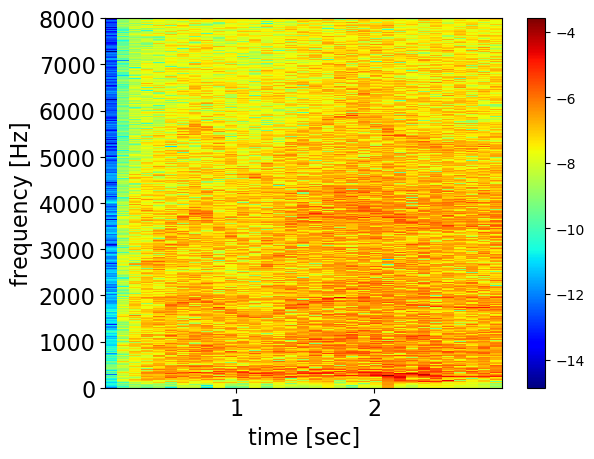

In [3]:
spec = spectrogram(x_drill, convert(Int, 100e-3*fs_desired), convert(Int, 10e-3*fs_desired), fs=fs_desired)
plot_spectrogram(spec, fs_desired);

In [4]:
# specify order and pole
order = 32
z = 0.5756

# initialize Y
Y = zeros(order*3,1)

# initialize memory struct for Y
taps_all = Array{Array{Float64,1}}(undef, length(x_drill))
Sap = Array{Complex{Float64},2}(undef, length(x_drill), order)

# get update matrices
T, u = allpass_update_matrix(order, z)

# perform updating
for k = 1:length(x_drill)
    
    Y, taps_all[k] = allpass_update(x_drill[k], Y, order, z, T=T, u=u)

    Sap[k,:] = FFTW.fft(taps_all[k])
    
end
Sapr = real(Sap)
Sapi = imag(Sap)
;

In [5]:
audioplayers(x_drill, [taps_all[k][32] for k=1:length(x_drill)], fs=fs_desired)

<source src="data:audio/wav;base64,UklGRjzuAgBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQDuAgDYTNG42fvFuGjpGTlHnjk5J8+COWucpznRhZE5tkiFOUtjUDkj7mo5F0UuOe4bDDn2rhA3PfKMudlN0Lk3bve5VZ4Fuo49HbpOeyO6K8EFukddxrnaSrm5VGG0uWFl5bmLyuS5qSWOuX8+v7jeDzM4P8KLt7RTz7eoM3u35nz/uCe56rjzc1y56Vz9uBN58DeZWLI451gpOY0fXzmPafM4lVk2tiWYpTfUibw4fPpoOWCnjjikNY22hhLpOKOb+TcWMS44Hho8tvuCE7hXKCK5MeR0uamlqrmJ8+a5ET7YuRXkfbmTAla5VkT5uGPxKrkxLwi5vKGsuLh9P7ntfhC5F2qbN7ALuDhCqkU5sSStOfMRmjmfaDw5fuWMOaAZjzl3D9M4rzhiuAkfCrlagw65gD2ut8iVCLmcFyy5Ezd5t+GEoDjjHDI4QGFBOAxCqDhriJA58g2+ORX/ADosrfY5o83VOVytlTnt3BU5vpfHOEC+MTdV9Ri5OyGKuftaprg9BcQ3wp5QuIBx87ip5Fm5+QaIuSOL/bh0XzU3Fs6DOKFJUTlYO4g5FWSPORTZYjn5Yyg4UMG6NBSwpLdyoYA4/yiuNkR42Tdrpl+4qEwvucDtG7lZXpm50CfZuQ+g6Lmkur250EMpucY9tDixnpo5oVzVOaf+BTogp/c5ekN3OUdu1zhekBo5jo5YN3FdbbktRYa5vmlbucVVgbn1a5S5dkvyuWQ1Brogwea53ibnuSwdxbnG0Pa51KnruRbri7mHQRq5l2EwuSvfXbkNrk65okEnuHpeJDnZGxQ6QlEPOgdk0TmRODs5srLst7DsQTeg3UC3gToOueHUd7kNofG4vLg8OZZl9TlNsMA52A5VOSc/ZznkhpM5RvPWOeizCzoUgxA6nCPAOeSzgzmbEzE5EYKnuP+darmg8NG5I8TvubrR/LlPcsy5nkQPupy2MLqMdRG6wmlguQO0QzjoBpU4BdOhOJAxWznjmcQ5CQ0hOqoQaDoshIg6SN1wOlRZVTocej46zoI+OtGULTqCHQ06ZjCyOauRlzhPMsI4JLOgOG0E2jcJXNC4rs3YuM3eZrh7Ceo4dXkkOWuvjjiExpi2bBsYtjmnpzc+5ia5BKCpuXsR67nlXFC5MuwhuI1RH7kB2+65FAgKuuR117kjaEi5fNFfuTb1trniOSS6xYIour5oobn/4ya5m5GWuBJS9LjJAkk4MJrONV7lWDjp2iM5Y0xeOa11DrmyjY252IeHudBobrkubqG5cbo1unZ6a7otfl+6nRg7uowhU7rDNGG6IcQ1ulO4xrkVqYy5Z2WpuCf+rbj/LmS5gE7TuCrhCDhJ67w4A2zPNbZPR7m6F1G5htkcuQzBk7dU2ik538DkObZLsjk6GP44ezlUOaDKrTnYF205SyYoOdEbGzkYv+g5H/s0Ol+LIDpsKvI5bhy9ObmbkDmrL4I418cxuG5SgriXhGI4GncEOb0tYTk8g1I5aRKXOe/jbzn34Kg4XDIuOUyunznzKIQ5fWrsOFeBnznn49o5xqW0OXkNkDmSaUQ5XfiCuP7VrbmMvMm5FClVubdgLrnpCF65s62Mudq2P7lTYCq4k66wM6bbKbjrWbe38VIZOY9CFjkATGc2zVpVOUpGADoeXd05Ms5QOci5FDmgTkE4F9HaN6tfEznNweU5llAUOhmFAjr1NI0550d4OMJXhLcVoj+4NTOSOFkkazm5SIU5/zCJOYq3sjm6lwk6jFO9Odp517hTqDS5t9jWuX9JBLqiHVW6NEyPuoaMSLqqJfa56PQ+upS0bboMPkO6QlrPubfTiblAWLG430HTOGhlgTml71g4qOnruM2yRDabvvk4kwicOS3gOTlgrw850LV2OSlgzTm8tgI69qfMOZpniTl9qZw5PGrhOU4I8jnRDgU65iMcOrhS2zll5Nk5ylMbOiTm3jlnGpk5KhM/OTHyVbehnJm5GA7tucD5Arq/nNO5J0TAuWmB0bnEq4W5gyMXuX77JLmOITQ5a7iGOQEgYTkPR8M5O80mOq9jdjqjJ146+WJXOicEUjpxNWw6yGo9OvKbxTnH9AU5JANgOd8tJzmO+0Q4PzfcuXxEMbq8el26R76RuusrjbqTe3S6u6qAumLvibquqWW62hlauvm3WLqBtVe6EMIouqjc4Ll1FxW6RLlluhnHVLpmtSy6Otfuuez1xrmTA6S5Vpypt0j4PTl0Pd44M+SsOPhsnjnVMC06I/seOutA6zlx6/0511TdOUiusTms6NY4ADywuM4ejrlFSUC58+xUtzjjszhJZX84VxEYOXZ3Zrizlka4ZramNryf/LU8myG5MysluWhxGLjGMcq4copbN4fMdDjYGvY2CT+VuWXCKbliQJO4GlsBNqPaiTnrztc5E3UXOhNwdjr0o0Y68ZwmOo2hQjqMgEs62nsuOlkqZDosGWQ69JQjOvxNCzqyDcY5QlHEOV7FrjlO6u84mO6JOP0w5zfnbYW54xOauVKH6rgtkT+5RHHmudbDDbpgjCi6eXIyuo09GbpiCMy5EOh2uYKr1zhe3Yw5EYibOT82kjmeVZM5XQtAOe4ONjmF0Ls4bMNNNkuZDDnyLUG2/GDuuDa1grmvyu25hcEfunOVOLqk0Fu6fUVuujGDP7ro7qa5x+cVuXvIg7mHChq6YNJJupQtNbqKEOG5j0OGuSOs+jdzk2k5qcWMOY2PkzndDIE51yrEOau5pTmkz+o5tnMJOgKmDzrLn8I5CpU9OZI6eTioczk4gWlyuQ4QObpuewm6oxK9ueKRw7ldTfS5+PqIuZp6F7n477e5B4kjusKMDbrRZZa598xcuU/oJbpUpV+6ZMYquv90y7kzOrG5pVbQuZOSoLmFSaW5hqORuWCOnrk33Ne2ZEaBOQfttDnSIQ06jBBUOmWARTrmOy0612jxOV6YQzlzaco43WoYOc8IBTm+0xs5Wxm7OGiiFrmIxwO6uh76uV36Mrm3aI+4p0ehOAnHwTmFMgw6sq3qORXkjjmkQpY58bBCOY3ogjkms605KLWMOdVL9zlQigg60ZEwOqXZKzrKrBU6Jty8Ocu0Jzml13g5mEFdObGWGjmnzAo5Mq+SOeC6jzdAxxK5S4iDNpn3EjnGlPc4XyKlMTG6zjgGeiy4M61OuSGaBLmes7i3lba1OIrC5bhphZa4SPbnuOHHHjYXRrA4Ym6IuXvF07lyHua53dmxuf5EyLlHN9a55NgcuseTCbrduOa5QGXeucxF47n3AKm5NB6duH1yQDkfmCA6dW1QOpnpbTo6IS86zBY0Ohut9znV/oU5EhCgOaFuxDlsJ+I5BX+DOccFnrgNAOa4P8DHN8CeAblvKXy5qlHdudi1Abp4ki26nPQlulbtR7oF+jm6tOLyuaNgNbmNPOS5KWQbuuyX77kijY25nZAEuWMFy7jQjqY28vWDOeOt4zn7Dxo6SFsoOts2VzoIR2M6vrhtOu+gWDoZ/Wk6TTBsOm15UzqWKSw6jKDuOSZ+vTmF0MU5D9ZuOfo/njk+eq05x2JGOSIPODlWchU3asIfuTF3v7lFVPq593eQuUbtQ7kgt9u5JWIdugd9/rnu2ua5ziukuU2iV7ntqPG4xy+Dt1qWtLjO+aC4M/TLuPC8W7nO8YK5idSEuf1Ojbm2Xp+5o/bpuULYHLq2lUO6AL9Dukf0M7omGje6uWYgugp/FbpZ6a+58BqquCMXg7bch8G3CUkCN2anhzhv2Y04HUmoOTaKCDroPSs6fx8xOtgbKzoTbhI6UHG6OfxcwjmTnAo5rxY/OduafzgT6+K3QG+FuaQds7l4gMq4EUBjORKkNziK8pK5VzCwuQZgiLmFMcW4FEu/Nnm2DzrId

In [6]:
spec = spectrogram(x_drill_ap, 32, 31, fs=fs_desired)
plot_spectrogram(spec, fs_desired);

UndefVarError: UndefVarError: x_drill_ap not defined

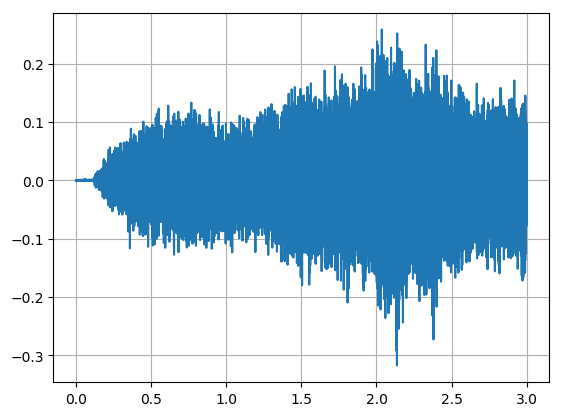

In [7]:
plt.plot(t,x_drill)
plt.grid()

## Calculate spectrum

In [8]:
S = FFTovertime(x_drill_ap, 32, 0, rectangularwindow)
Sr = real.(S)
Si = imag.(S)

UndefVarError: UndefVarError: x_drill_ap not defined

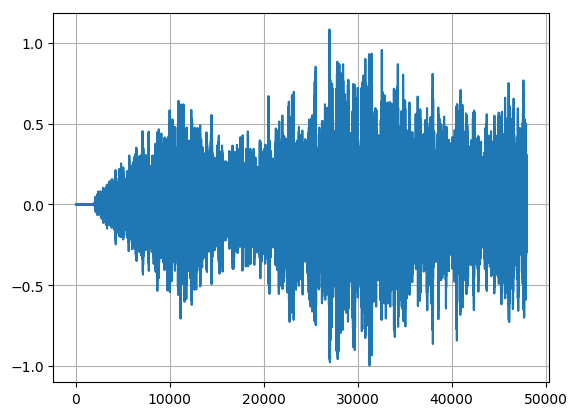

In [9]:
plt.plot(Sapr[:,13])
plt.grid()
#plt.xlim(10000,10100)

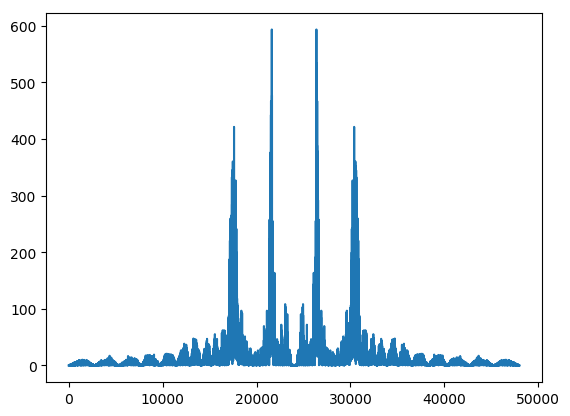

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000472C6DA0>

In [10]:
# check whether AR prior can be used
plt.plot(FFTW.fftshift(abs.(FFTW.fft(Sapr[:,12]))))

## Inference

In [11]:
# parameters
AR_order = 2
iterations = 3
Λ_meas = 1e6

# create factor graphs
fg = FactorGraph()

# AR node
@RV γ ~ ForneyLab.Gamma(placeholder(:a_γ), placeholder(:b_γ))
@RV θ ~ GaussianMeanPrecision(placeholder(:μ_θ, dims=(AR_order,)), placeholder(:Λ_θ, dims=(AR_order, AR_order)))
@RV Sprev ~ GaussianMeanPrecision(placeholder(:μ_Sprev, dims=(AR_order,)), placeholder(:Λ_Sprev, dims=(AR_order, AR_order)))
@RV S ~ LAR.AR.Autoregressive(θ, Sprev, γ)

# selection and input
d = zeros(AR_order)
d[1] = 1
@RV x ~ DotProduct(d, S)
@RV γv ~ Gamma(placeholder(:a_γv), placeholder(:b_γv))
@RV v ~ GaussianMeanPrecision(0, γv)
@RV y = x + v
placeholder(y, :y)

#ForneyLab.draw(fg, external_viewer=:default)

Variable(:y, Edges:
Edge belonging to variable y: ( addition_1.i[out] )----( placeholder_y.i[out] ).
)

In [12]:
# recognition factorization
q = RecognitionFactorization(θ, S, Sprev, γ, γv, ids=[:Θ :S :Sprev :γ :γv])
algo = compatibility_fix(variationalAlgorithm(q))
#Falgo = freeEnergyAlgorithm()
eval(Meta.parse(algo));
#eval(Meta.parse(Falgo));

In [31]:
current_a_γ = 1
current_b_γ = 0.0001
current_a_γv = 0.0001
current_b_γv = 0.0001
current_Λ_θ = tiny*diagm(randn(AR_order))
current_μ_θ = randn(AR_order)
current_μ_Sprev = randn(AR_order)
current_Λ_Sprev = tiny*diagm(randn(AR_order))
F_tot = []
a_γ_tot = []
b_γ_tot = []
μ_S_tot = []
Λ_S_tot = []
μ_θ_tot = []
Λ_θ_tot = []
μ_pred = Float64[]

p = Progress(length(Sapr[:,12]), 1, "Observed ")
marginals = Dict()

#marginals[:S] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=zeros(AR_order), w=tiny*Ic(AR_order))
#marginals[:Sprev] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=zeros(AR_order), w=tiny*Ic(AR_order))
for sr in 1:length(Sapr[:,12])
    update!(p, sr)
    marginals[:θ] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=current_μ_θ, w=current_Λ_θ)
    marginals[:γ] = ProbabilityDistribution(Univariate, Gamma, a=current_a_γ, b=current_b_γ)
    marginals[:γv] = ProbabilityDistribution(Univariate, Gamma, a=current_a_γv, b=current_b_γv)
    marginals[:Sprev] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=current_μ_Sprev, w=current_Λ_Sprev)
    for it = 1:iterations
        
        data = Dict(:y => Sapr[sr,12],
                    :μ_Sprev => current_μ_Sprev,
                    :Λ_Sprev => current_Λ_Sprev,
                    :μ_θ => current_μ_θ,
                    :Λ_θ => current_Λ_θ,
                    :a_γ => current_a_γ,
                    :b_γ => current_b_γ,
                    :a_γv => current_a_γv,
                    :b_γv => current_b_γv)
        data, marginals = step_all!(data, marginals)
        #push!(F_tot, freeEnergy(data, marginals))      
        push!(a_γ_tot, marginals[:γ].params[:a])
        push!(b_γ_tot, marginals[:γ].params[:b])
        push!(μ_S_tot, mean(marginals[:S])[1])
        push!(Λ_S_tot, ForneyLab.unsafePrecision(marginals[:S])[1])
        push!(μ_θ_tot, mean(marginals[:θ]))
        push!(Λ_θ_tot, ForneyLab.unsafePrecision(marginals[:θ]))
        
        
        current_μ_θ = mean(marginals[:θ])
        current_Λ_θ = ForneyLab.unsafePrecision(marginals[:θ])
        current_a_γ = marginals[:γ].params[:a]
        current_b_γ = marginals[:γ].params[:b]
        current_μ_Sprev = mean(marginals[:S])
        current_Λ_Sprev = ForneyLab.unsafePrecision(marginals[:S])
        current_a_γv = marginals[:γv].params[:a]
        current_b_γv = marginals[:γv].params[:b]
    end
    push!(μ_pred, sum(current_μ_Sprev.*current_μ_θ))
    
end

Observed 100%|██████████████████████████████████████████| Time: 0:00:42


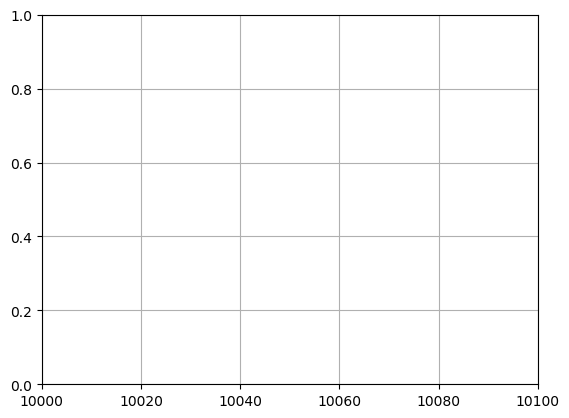

In [32]:
### plt.plot(Sapr[:,1])
plt.xlim(10000,10100)
plt.grid()

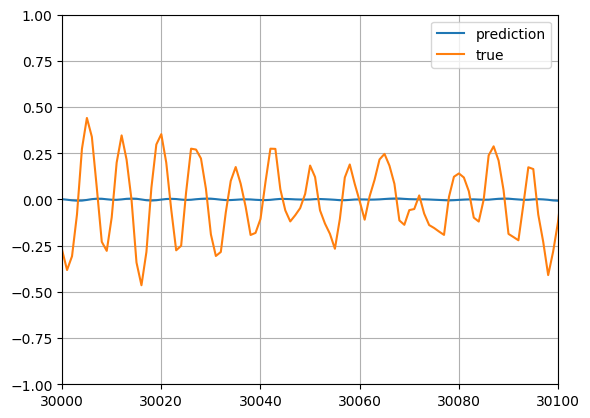

In [33]:
plt.plot(μ_pred, label="prediction")
plt.plot(Sapr[2:end,12], label="true")
plt.legend()
plt.xlim(30000, 30100)
plt.ylim(-1,1)
plt.grid()

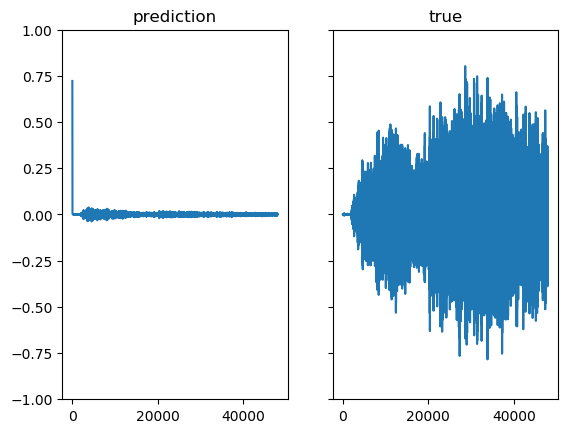

(-1, 1)

In [34]:
# error
fig, ax = plt.subplots(ncols=2, sharey=true)
ax[1].plot(μ_pred[1:end-1])
ax[2].plot(Sapr[:,12])
ax[1].set_title("prediction")
ax[2].set_title("true")
plt.ylim(-1, 1)

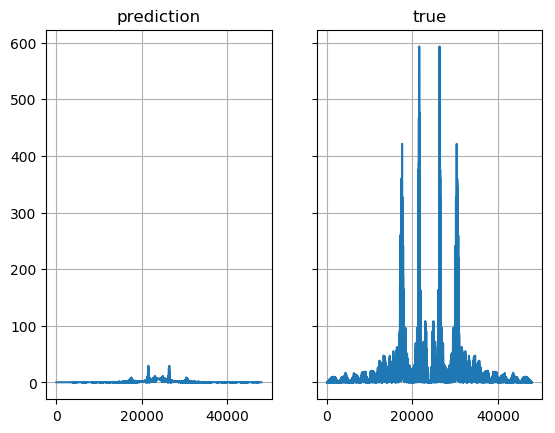

In [35]:
# FFT of prediction
fig, ax = plt.subplots(ncols=2, sharey=true)
ax[1].plot(FFTW.fftshift(abs.(FFTW.fft(μ_pred[1:end-1]))))
ax[2].plot(FFTW.fftshift(abs.(FFTW.fft(Sapr[:,12]))))
ax[1].set_title("prediction")
ax[2].set_title("true")
ax[1].grid()
ax[2].grid()
#plt.ylim(-1, 1)

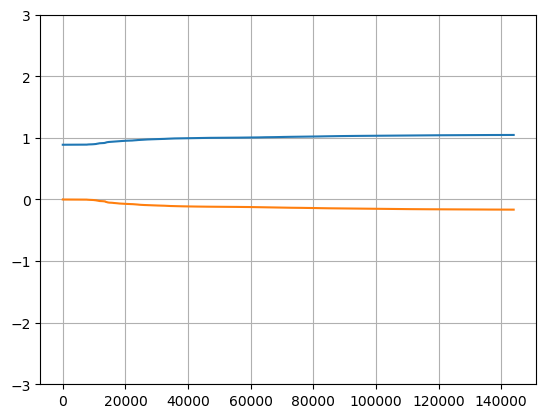

(-3, 3)

In [36]:
plt.plot([μ_θ_tot[k][1] for k=1:length(μ_θ_tot)])
plt.plot([μ_θ_tot[k][2] for k=1:length(μ_θ_tot)])
plt.grid()
plt.ylim(-3, 3)

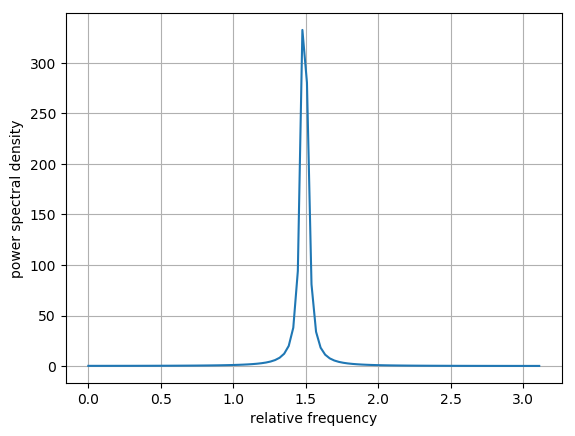

PyObject Text(24.000000000000007, 0.5, 'power spectral density')

In [37]:
theta = 0:pi/100:pi
psd = 1 ./(abs.(1+0im.+μ_θ_tot[end][2]*exp.(-1im*theta)+μ_θ_tot[end][1]*exp.(-2im*theta)).^2)
plt.plot(theta, psd)
plt.grid()
plt.xlabel("relative frequency")
plt.ylabel("power spectral density")